In [1]:
import numpy as np                 # Numerical computing
import pandas as pd                # Data manipulation and analysis
import matplotlib.pyplot as plt    # Data visualization
import seaborn as sns              # Enhanced data visualization

from sklearn import datasets      # Datasets for practice
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.preprocessing import StandardScaler     # Data preprocessing

from sklearn.linear_model import LinearRegression    # Linear Regression
from sklearn.tree import DecisionTreeClassifier      # Decision Trees
from sklearn.ensemble import RandomForestClassifier  # Random Forest
from sklearn.cluster import KMeans                   # K-Means Clustering

from sklearn.metrics import accuracy_score, classification_report  # Model evaluation
from sklearn.metrics import mean_squared_error, r2_score           # Regression evaluation


In [3]:
data = pd.read_csv(r"C:\Users\afroz\OneDrive\Documents\New folder\heart.csv")

In [5]:
data.shape
data.head()
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
data.shape

(303, 14)

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

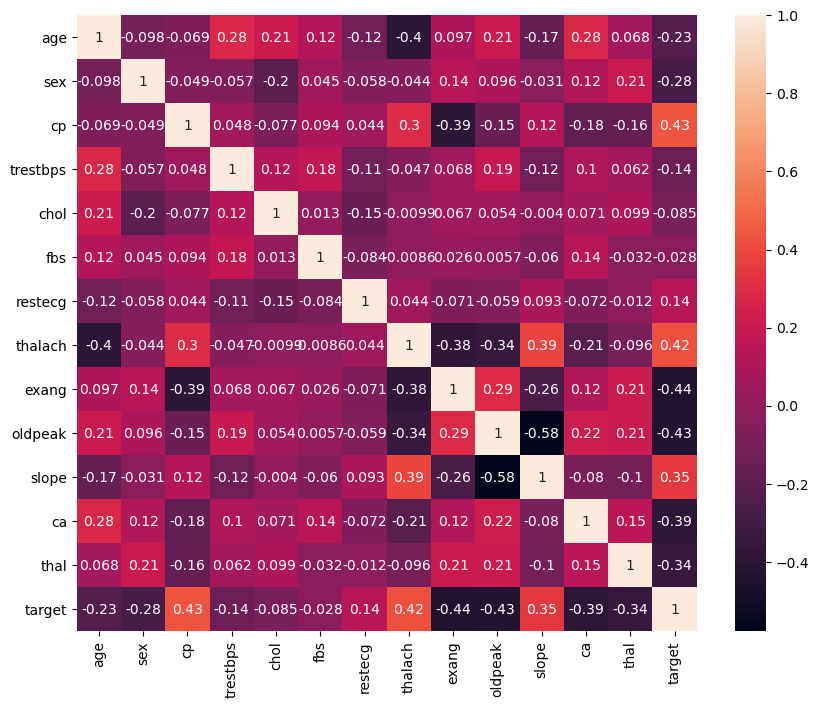

In [14]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(),annot = True)
plt.show()

In [17]:
print(data.corr()['target'].abs().sort_values(ascending = False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


1    165
0    138
Name: target, dtype: int64


C:\Users\afroz\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


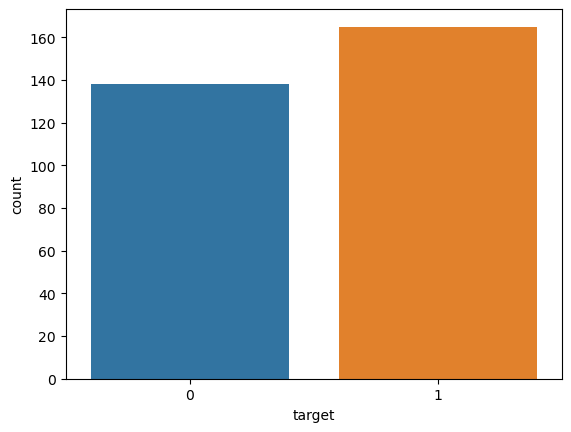

In [24]:
y = 'target'
ax = sns.countplot(data['target'])
target_val = data[y].value_counts()
print(target_val)

In [30]:
print('heart disease patients:' + str(round(target_val[0]*100/data.shape[0],2)))
print('without heart disease:' + str(round(target_val[1]*100/data.shape[0],2)))

heart disease patients:45.54
without heart disease:54.46


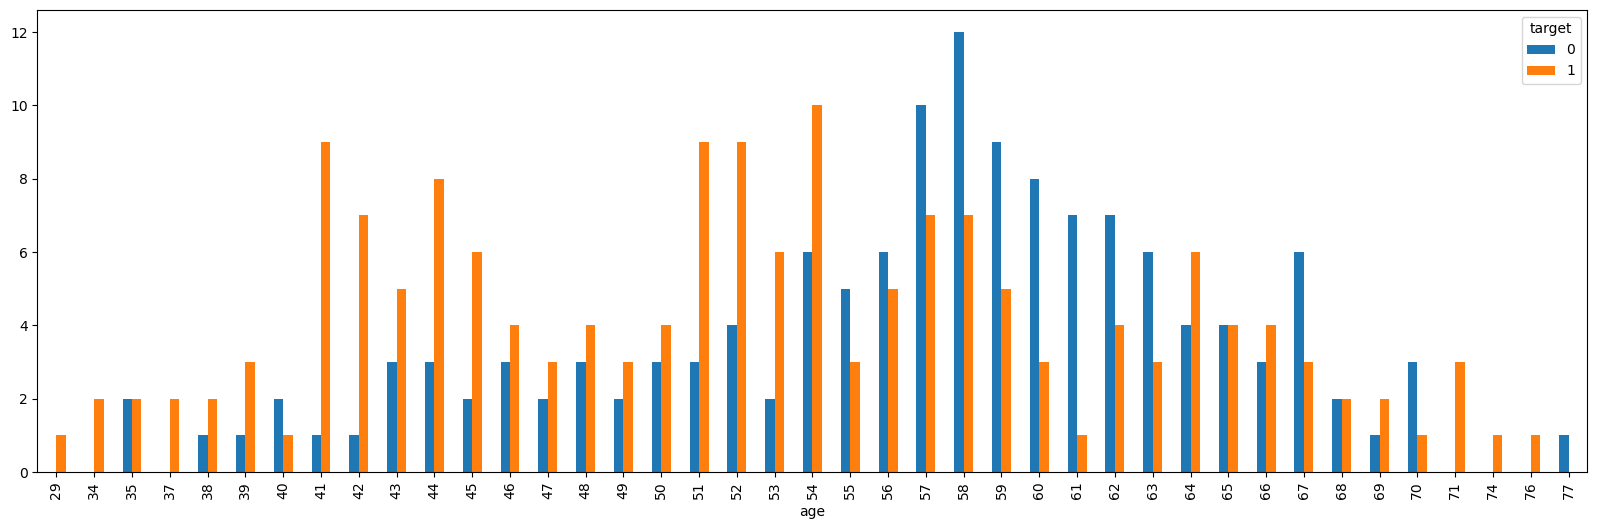

In [31]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.show()

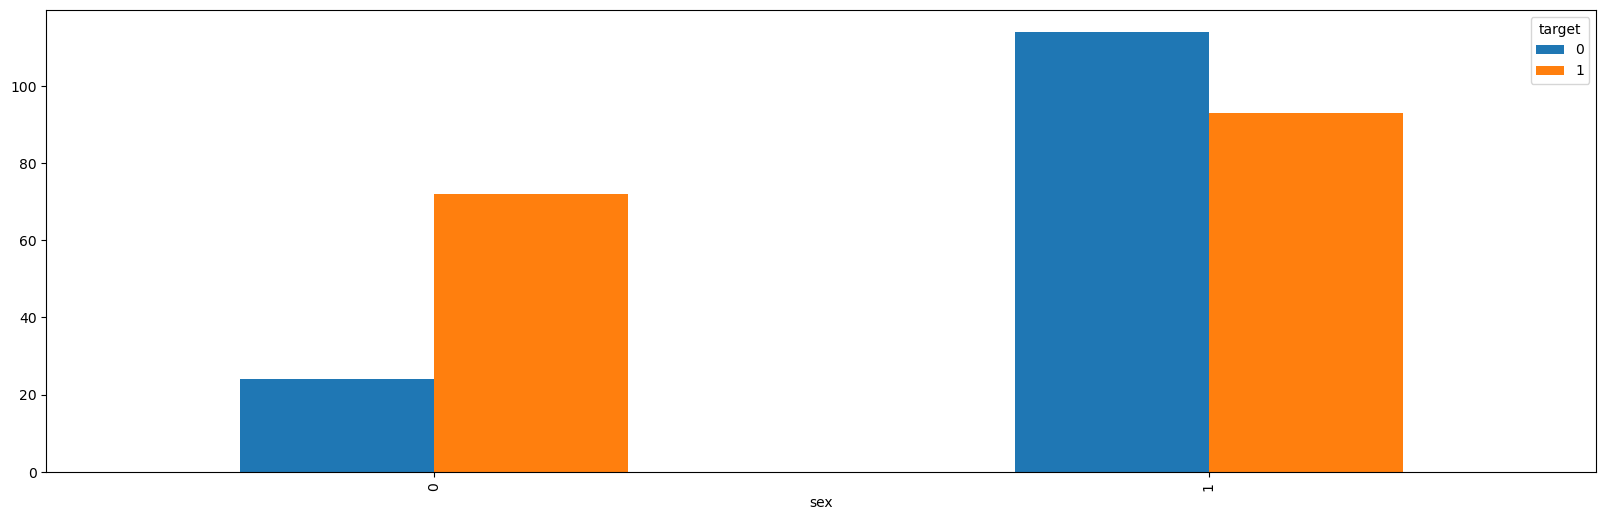

In [33]:
pd.crosstab(data.sex,data.target).plot(kind = 'bar', figsize = (20,6))
plt.show()

In [34]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:xlabel='fbs'>

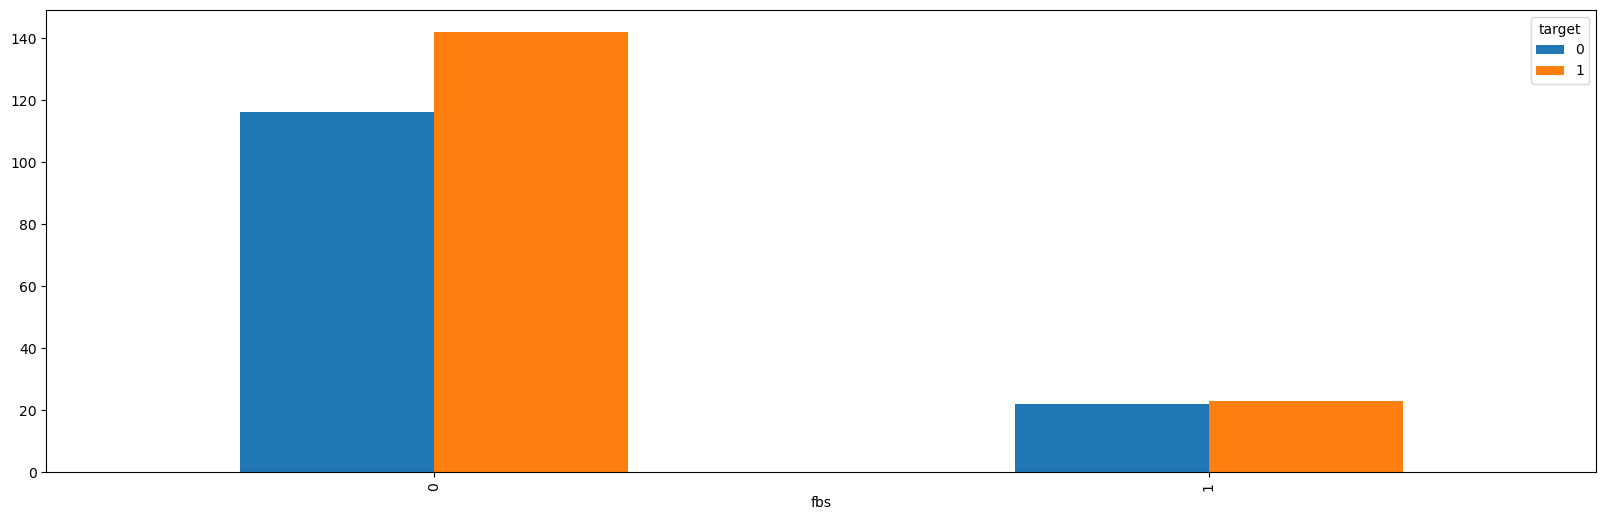

In [35]:
pd.crosstab(data.fbs,data.target).plot(kind = 'bar', figsize = (20,6))

C:\Users\afroz\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='thal', ylabel='Density'>

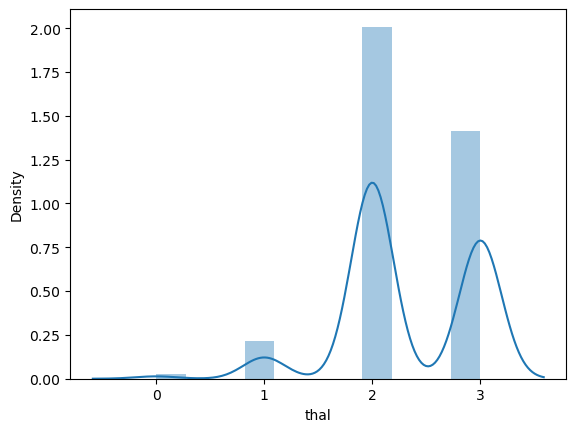

In [44]:
sns.distplot(data['thal'])

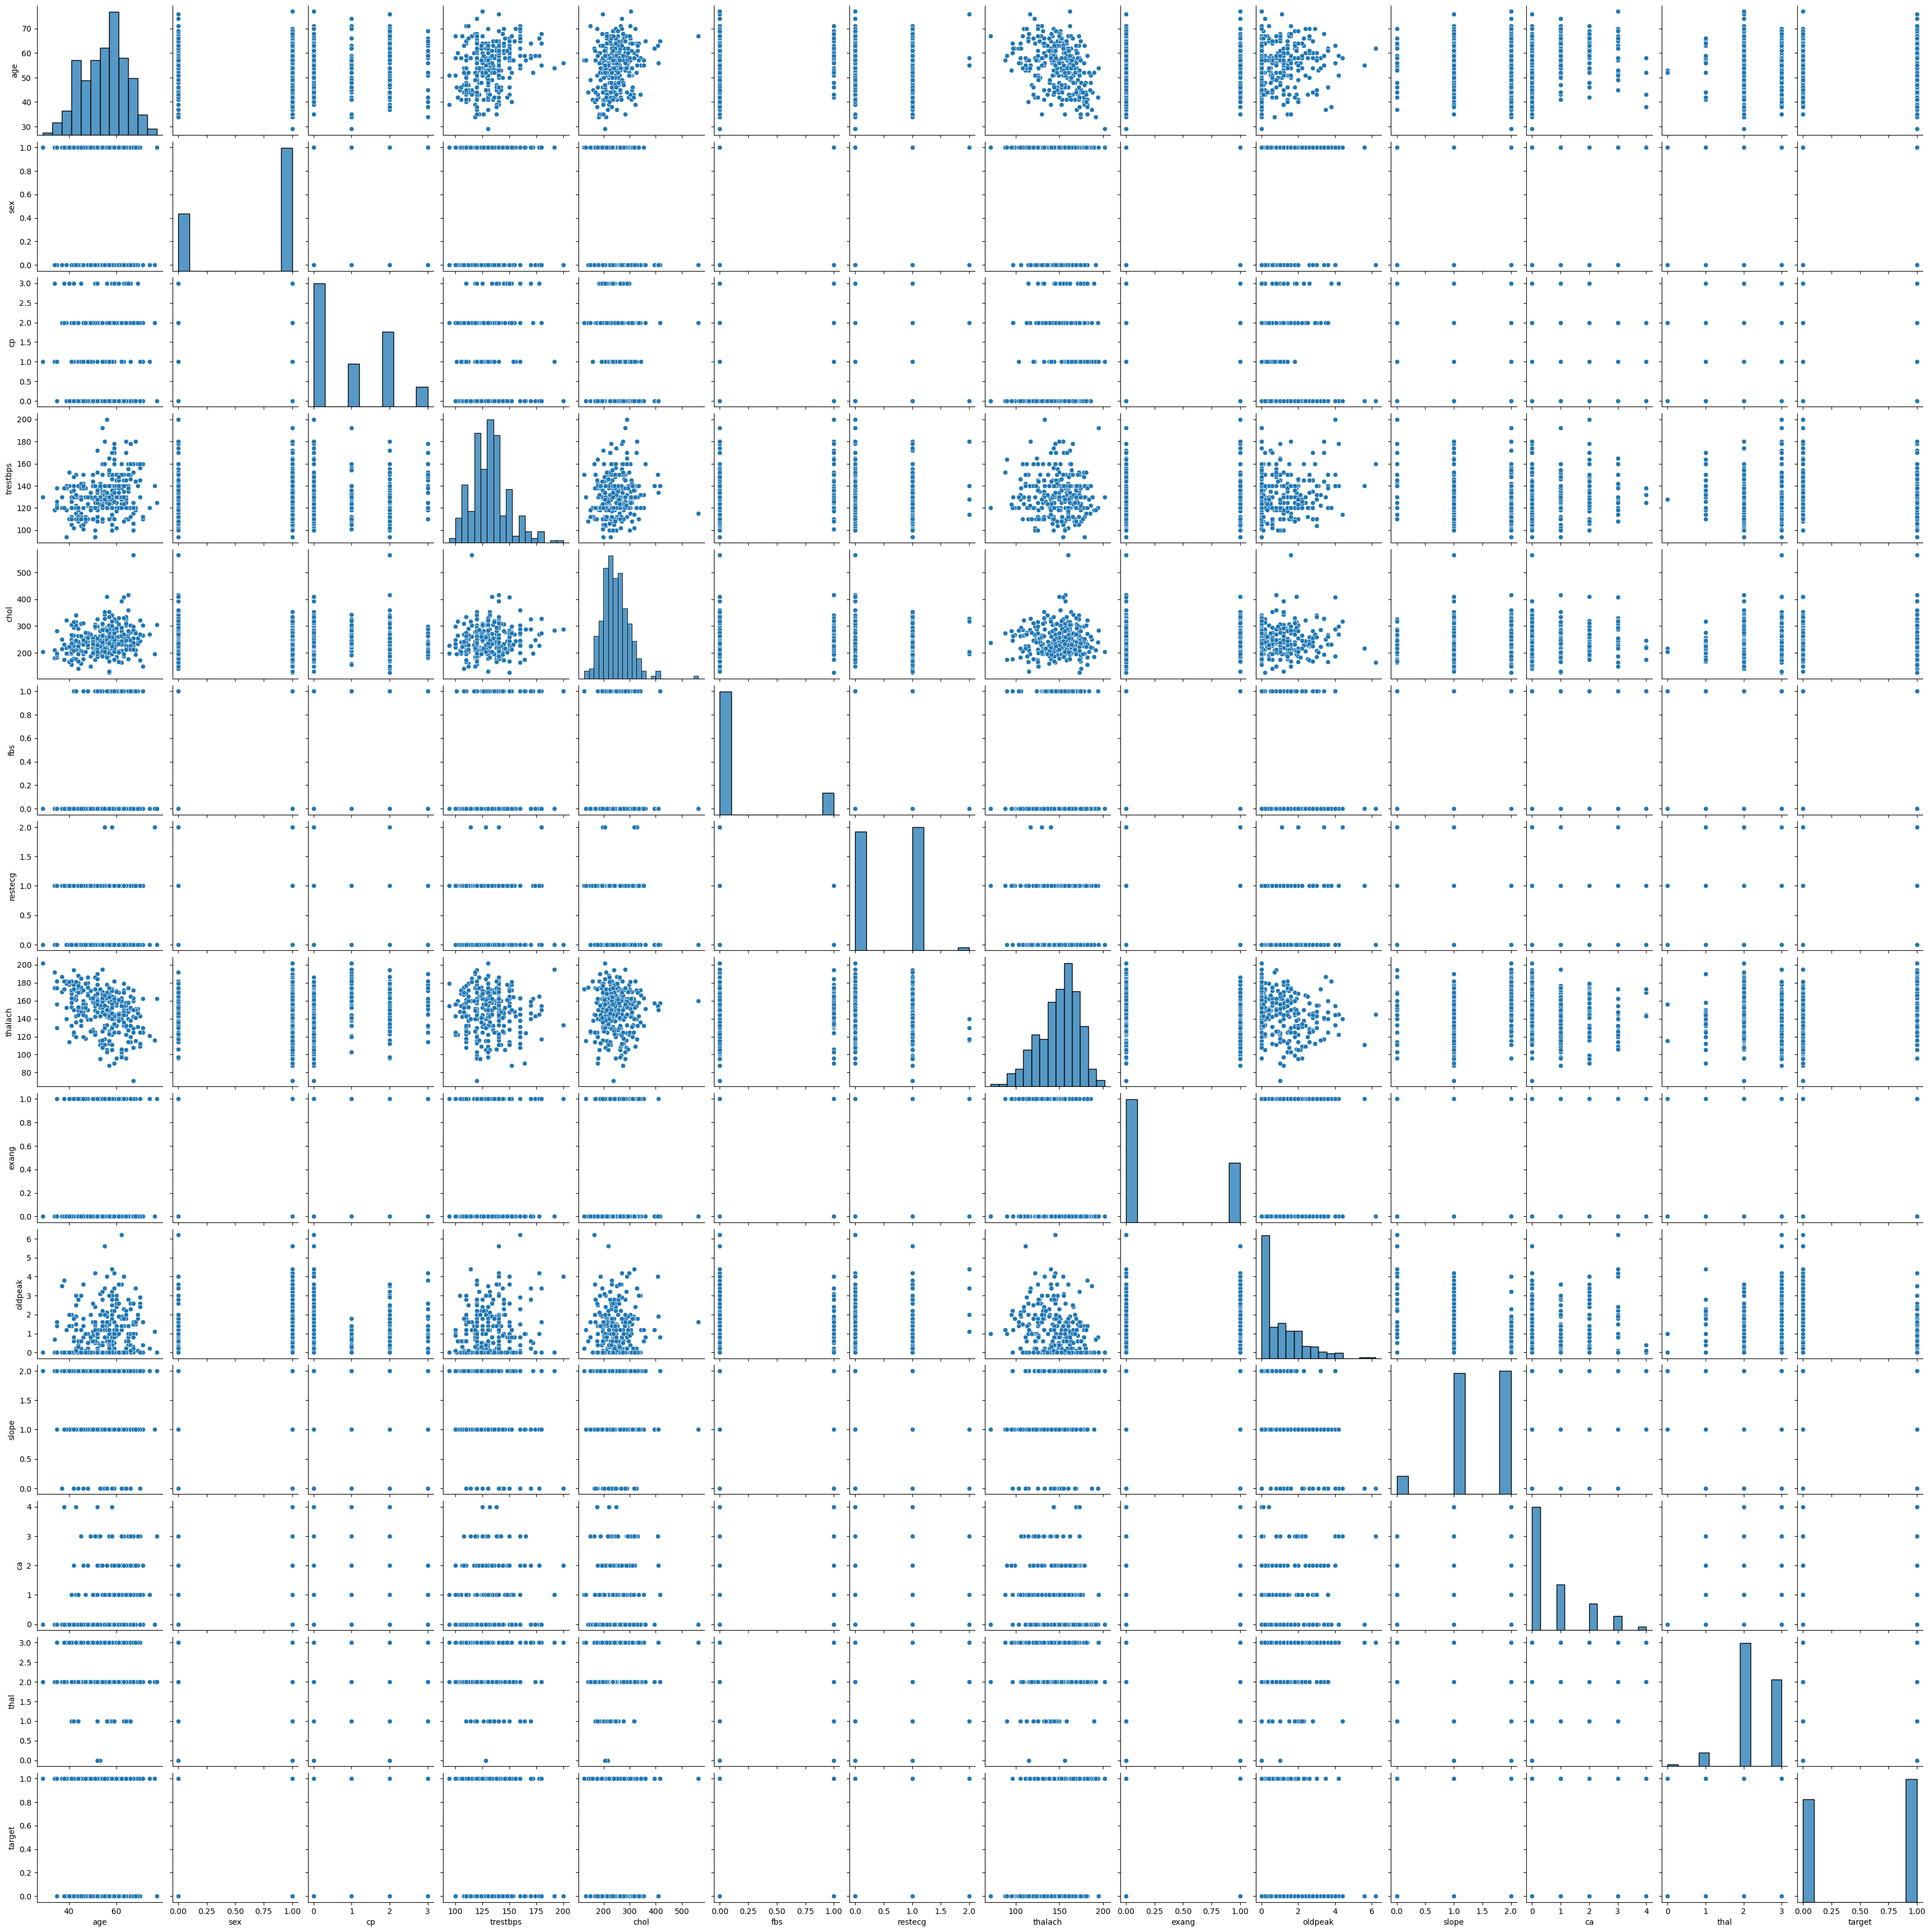

In [53]:
sns.pairplot(data= data)
plt.show()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

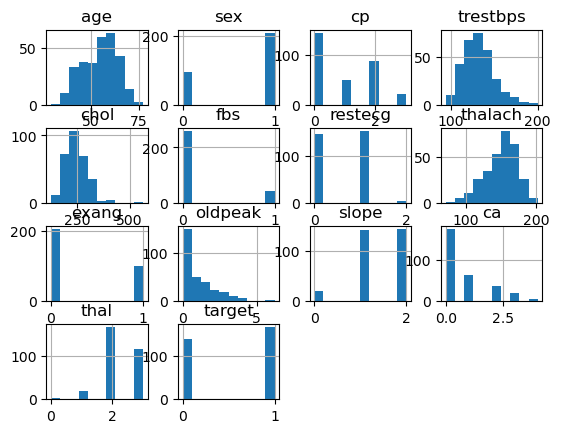

In [52]:
data.hist()

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [55]:
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame called 'data' with features (X) and a target variable (y)
X = data.drop(columns=['target'])  # Features
y = data['target']               # Target variable

# Split the data into a training set (e.g., 80%) and a testing set (e.g., 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train: Training features
# X_test: Testing features
# y_train: Training target variable
# y_test: Testing target variable
print(X_train.shape[0], X_test.shape[0])

242 61


In [56]:
X_train.shape

(242, 13)

In [58]:
X_test.shape

(61, 13)

In [60]:
y_train.shape

(242,)

In [61]:
y_test.shape

(61,)

In [62]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

In [64]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_lr = logreg.predict(X_test)
print(y_pred_lr)

[0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 88.52 %


In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))
print("Accuracy:",accuracy_score(y_test, y_pred_lr))

[[25  4]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Accuracy: 0.8852459016393442


In [70]:
from sklearn.linear_model import LogisticRegression
model = train_model(X_train, y_train, X_test, y_test, LogisticRegression)

Train accuracy: 85.54%
Test accuracy: 88.52%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
#Logistic Regression supports only solvers in ['liblinear', 'newton-cg'<-93.44, 'lbfgs'<-91.8, 'sag'<-72.13, 'saga'<-72.13]
clf = LogisticRegression(random_state=0, solver='newton-cg').fit(X_test, y_test)
#The solver for weight optimization.
#'lbfgs' is an optimizer in the family of quasi-Newton methods.
clf.score(X_test, y_test)

0.9344262295081968

<AxesSubplot:>

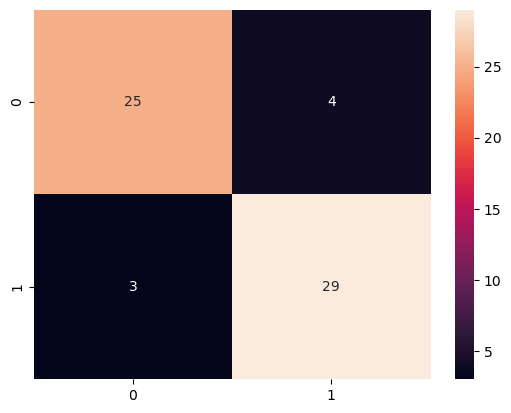

In [73]:
matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(matrix, annot = True, fmt = 'd')

In [84]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred_lr)
print("precision:", precision)

from sklearn.metrics import recall_score
recall = recall_score(y_test,y_pred_lr)
print("recall:", recall)

F_score = ((2*precision*recall)/(precision+recall))
print('F_score:', F_score)

precision: 0.8787878787878788
recall: 0.90625
F_score: 0.8923076923076922


# Random forest

In [86]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(X_train, y_train)

y_pred_rf = randfor.predict(X_test)
print(y_pred_rf)

[0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0]


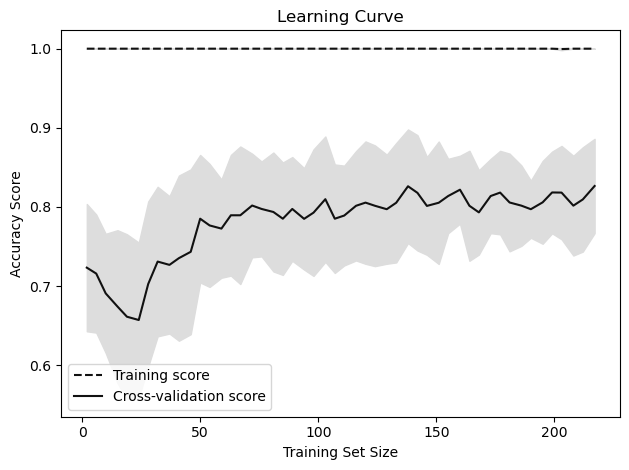

In [87]:
from sklearn.model_selection import learning_curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

random forest score

In [88]:
score_rf = round(accuracy_score(y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 85.25 %


In [136]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=60, random_state=42)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.836


<AxesSubplot:>

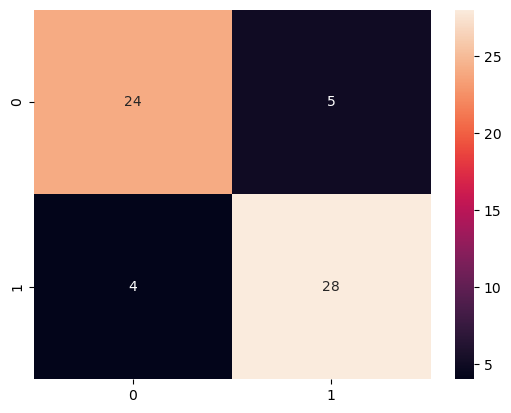

In [95]:
matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(matrix, annot = True, fmt = 'd')

In [96]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred_rf)
print("precision:", precision)

from sklearn.metrics import recall_score
recall = recall_score(y_test,y_pred_rf)
print("recall:", recall)

F_score = ((2*precision*recall)/(precision+recall))
print('F_score:', F_score)

precision: 0.8484848484848485
recall: 0.875
F_score: 0.8615384615384615


# Naive Bayes Model

In [99]:

from sklearn.naive_bayes import GaussianNB
nb = train_model(X_train, y_train, X_test, y_test, GaussianNB)

nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)
print(y_pred_nb)

Train accuracy: 81.82%
Test accuracy: 86.89%
[0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1
 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0]


In [102]:
score_nb = round(accuracy_score(y_pred_nb, y_test)*100,2)
print("The accuracy score achieved:" + str(score_nb)+ "%")

The accuracy score achieved:86.89%


<AxesSubplot:>

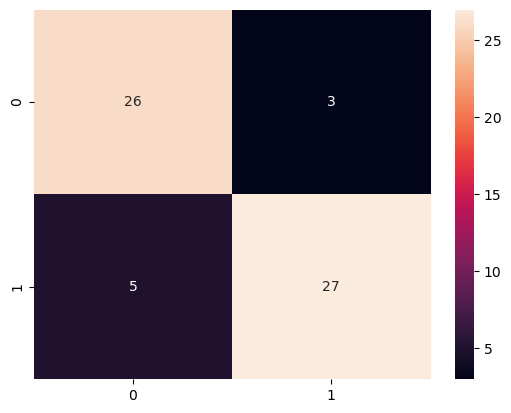

In [104]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(matrix, annot = True, fmt = "d")


Scoring 

In [109]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test, y_pred_nb)
print("precision:", precision)
recall = recall_score(y_test,y_pred_nb)
print("recall:",round(recall,2))
f_score = (2*precision*recall)/(precision+recall)
print('f_score', round(f_score,2))

precision: 0.9
recall: 0.84
f_score 0.87


In [111]:
from sklearn.neighbors import KNeighborsClassifier
knn = train_model(X_train, y_train, X_test, y_test, KNeighborsClassifier, n_neighbors = 8)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

Train accuracy: 72.31%
Test accuracy: 68.85%
[0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [139]:
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 68.85 %


<AxesSubplot:>

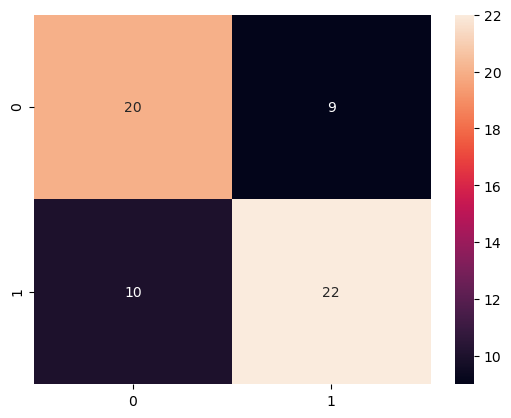

In [112]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(matrix, annot = True, fmt = 'd')

Scoring

In [113]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test,y_pred_knn)
print('precision:',round(precision,2))
recall = recall_score(y_test,y_pred_knn)
print('recall:', round(recall,2))
f_score = round((2*precision*recall)/(precision+recall),2)
print('f_score:', f_score)

precision: 0.71
recall: 0.69
f_score: 0.7


# DECISION TREE

In [114]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(y_pred_dt)

[0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0
 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1]


In [115]:
score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)
print("the accuracy score for decision tree is:" +str(score_dt) + '%')

the accuracy score for decision tree is:81.97%


In [127]:
from sklearn.tree import DecisionTreeClassifier
tree1= DecisionTreeClassifier(max_depth = 4, random_state = 42)
tree1.fit(X_train, y_train)
print("accuracy_training:{:.3f}".format(tree1.score(X_train,y_train)))
print("accuracy_test:{:.3f}".format(tree1.score(X_test,y_test)))

accuracy_training:0.884
accuracy_test:0.852


confusion matrix

<AxesSubplot:>

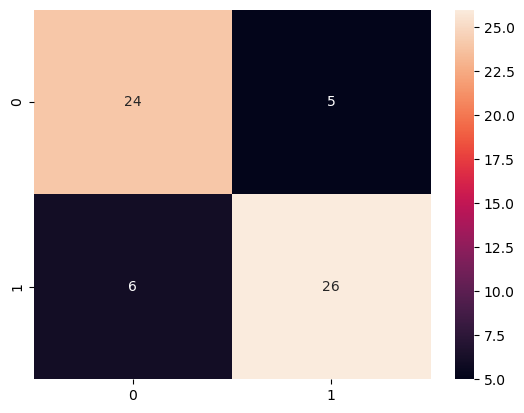

In [128]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(matrix, annot = True, fmt = 'd')

scoring

In [131]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test, y_pred_dt)
print("precision:",round(precision,2))
recall = recall_score(y_test,y_pred_dt)
print("recall:",round(recall,2))
f_score = round((2*precision*recall)/(precision+recall),2)
print('f_score:',f_score)

precision: 0.84
recall: 0.81
f_score: 0.83


# FINAL SCORE

In [132]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'Random Forests']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=8), DecisionTreeClassifier(max_depth=4, random_state=42), LogisticRegression(), 
        GaussianNB(), RandomForestClassifier(n_estimators=60, random_state=42)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    accuracy.append(score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [134]:
summary = pd.DataFrame({'accuracy':accuracy},index = classifiers)
round(summary,3)

,accuracy
KNN,0.689
Decision Trees,0.852
Logistic Regression,0.885
Naive Bayes,0.869
Random Forests,0.836


C:\Users\afroz\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

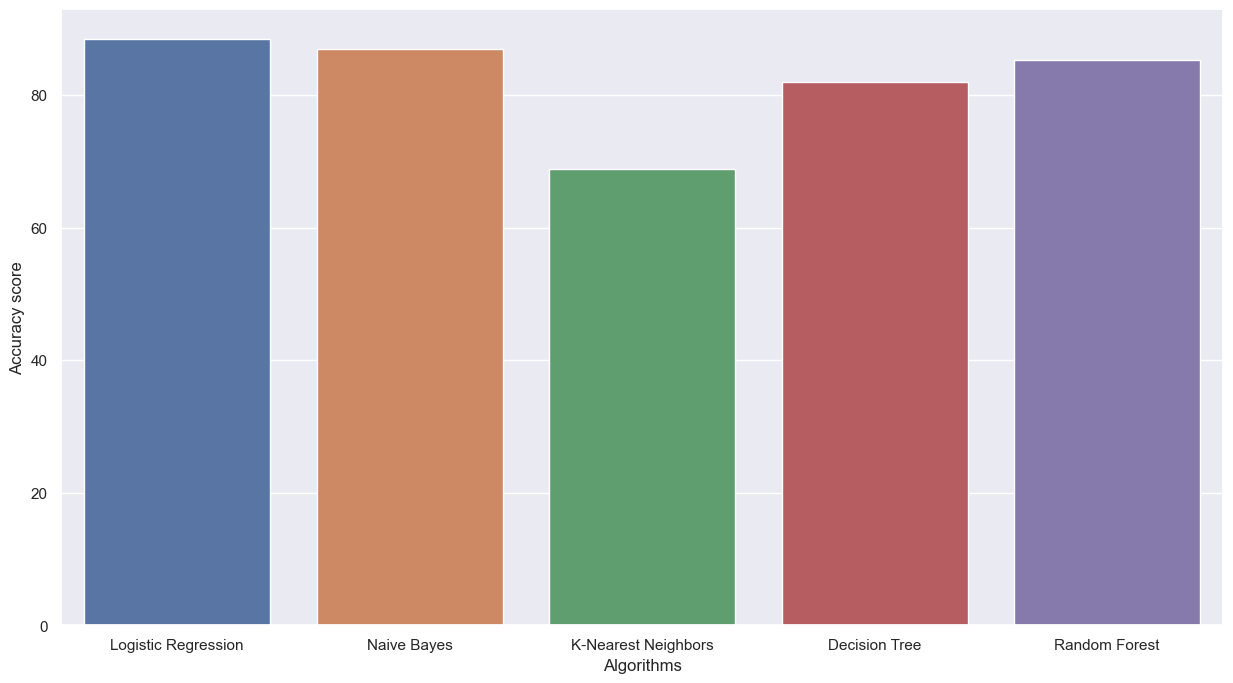

In [141]:
scores = [score_lr,score_nb,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Decision Tree","Random Forest"] 
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')


sns.barplot(algorithms,scores)